In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
path_test = '/content/drive/MyDrive/ResNet Data/ResNet Data'
category = ['Cats', 'Dogs']

In [3]:
training = []
def createTrainingData():
    for cate in category:
        path = os.path.join(path_test, cate)
        class_num = category.index(cate)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            # gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            new_array = cv2.resize(img_array, (64, 64))
            training.append([new_array, class_num])
createTrainingData()

In [4]:
x = []
y = []
for img, cl in training:
  x.append(img)
  y.append(cl)

In [5]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
type(x), type(y)

(list, list)

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [9]:
x.shape, y.shape

((960, 64, 64, 3), (960,))

In [10]:
#y

In [11]:
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 2)
print(Y.shape)

(960, 2)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=None)

In [13]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [14]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, Flatten, MaxPool2D, Dropout, RandomFlip, RandomRotation
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [15]:
mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
model = Sequential()
model.add(mobile)

# model.add(Conv2D(64, (3,3), activation = 'relu'))
# model.add(MaxPool2D((2,2), (1,1), 'same'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Conv2D(32 , (3,3), activation = 'relu'))
# model.add(MaxPool2D((2,2), (1,1), 'same'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.2))

model.add(Flatten())
model.add(Dense(16, activation= 'relu'))
model.add(Dropout(0.4))

model.add(Dense(8, activation= 'relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation = 'sigmoid'))

model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 2, 2, 1024)       3228864   
 nal)                                                            
                                                                 
 random_flip (RandomFlip)    (None, 2, 2, 1024)        0         
                                                                 
 random_rotation (RandomRota  (None, 2, 2, 1024)       0         
 tion)                                                           
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 16)                65552     
                                                         

In [16]:
# cnt = 0
# for layer in resnet.layers:
#   cnt = cnt+1
#   layer.trainable = False
#   if (cnt>=120):
#     break

In [17]:
# model.summary()


In [18]:
X_train = X_train.reshape(len(X_train),64,64,3)/255
X_test = X_test.reshape(len(X_test),64,64,3)/255
y_train = y_train.reshape(len(y_train),2)
y_test = y_test.reshape(len(y_test),2)

In [19]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((672, 64, 64, 3), (672, 2), (288, 64, 64, 3), (288, 2))

In [20]:
opt = keras.optimizers.RMSprop(learning_rate=0.000001)
model.compile(opt, 'binary_crossentropy', ['accuracy'])

In [21]:
hist = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 1000)

Epoch 1/1000
21/21 [==============================] - 21s 47ms/step - loss: 1.4003 - accuracy: 0.4881 - val_loss: 1.1949 - val_accuracy: 0.5590
Epoch 2/1000
21/21 [==============================] - 0s 23ms/step - loss: 1.3391 - accuracy: 0.5015 - val_loss: 1.0918 - val_accuracy: 0.5486
Epoch 3/1000
21/21 [==============================] - 0s 23ms/step - loss: 1.2703 - accuracy: 0.5238 - val_loss: 1.0287 - val_accuracy: 0.5451
Epoch 4/1000
21/21 [==============================] - 0s 24ms/step - loss: 1.2395 - accuracy: 0.5432 - val_loss: 1.0066 - val_accuracy: 0.5625
Epoch 5/1000
21/21 [==============================] - 0s 23ms/step - loss: 1.2680 - accuracy: 0.5074 - val_loss: 0.9820 - val_accuracy: 0.5694
Epoch 6/1000
21/21 [==============================] - 0s 23ms/step - loss: 1.3060 - accuracy: 0.4836 - val_loss: 0.9647 - val_accuracy: 0.5382
Epoch 7/1000
21/21 [==============================] - 0s 23ms/step - loss: 1.1841 - accuracy: 0.5327 - val_loss: 0.9535 - val_accuracy: 0.548

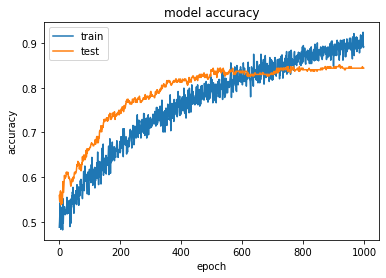

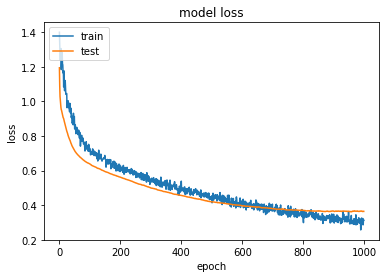

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
pred = model.predict(X_train)

In [53]:
len(X_test)

288

In [54]:
pred_li = [np.argmax(i) for i in pred]

In [55]:
#pred_li
ytrain_li = [np.argmax(i) for i in y_train]

In [27]:
test_li = [np.argmax(i) for i in y_test]

In [28]:
test_li

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,


In [56]:
from sklearn import metrics
# print(confusion_matrix(test_li, pred_li))
confusion_matrix = metrics.confusion_matrix(ytrain_li, pred_li)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Cat", "dog"])



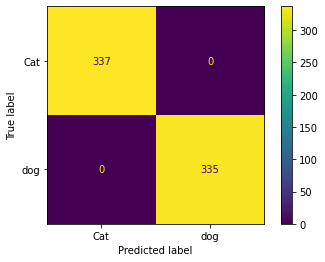

In [57]:
cm_display.plot()
plt.show()

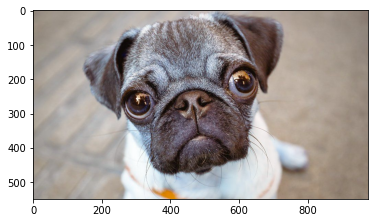

In [48]:
new_img = '/content/drive/MyDrive/ResNet Data/ResNet Data/dog02.jpg'
img_array = cv2.imread(new_img)
# img_array = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
plt.imshow(img_array)

In [50]:
new_array = cv2.resize(img_array, (64, 64))
print(new_array.shape)
test = np.expand_dims(new_array, axis = 0)
print(test.shape)
pred = model.predict(test)
print(f'Predictions : {pred}')

(64, 64, 3)
(1, 64, 64, 3)
Predictions : [[0.9885238 0.1714733]]


In [51]:
print('Actual Input : ', new_img.split('/')[-1][:3].capitalize())
if np.argmax(pred) == 1:
  print('Model Predicted : Dog')
else:
  print('Model Predicted : Cat')

Actual Input :  Dog
Model Predicted : Cat


In [34]:
path = '/content/drive/MyDrive/ResNet Data/ResNet Data/Cats'
path01 = '/content/drive/MyDrive/ResNet Data/ResNet Data/Dogs'

In [35]:
#Counting Data
cat_li = []
for img in os.listdir(path):
    cat_li.append(img)

dog_li = []
for im in os.listdir(path01):
    dog_li.append(im)

In [36]:
len(cat_li), len(dog_li)

(480, 480)